# Tutorial #14: Statistics I

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate

Let's consider a simple statistics experiment

Let's flip a coin 100 times and count the number of times it's Heads

We can do this by using a random function that picks 0 or 1, let's call heads=1

In [32]:
# randomly chooses 0 or 1, with a 50% probability of either
flip_result = np.random.choice([0,1])
print(flip_result)

1


Now let's do this 100 times and count the number of heads

In [33]:
num_heads = 0
for i in range(99):
    flip_result = np.random.choice([0,1])
    if(flip_result == 0):
        num_heads += 1
print(num_heads)

42


Now let's repeat this experiment 1,000 times to find the distribution of the number of heads

- save the result of each experiment in an array
- at the end print the mean and standard deviation of the results 
- `np.std(array)` calculates the standard deviation of an array

In [34]:
coinflip_array = []
for i in range(999):
    num_heads = 0
    for i in range(99):
        flip_result = np.random.choice([0,1])
        if(flip_result == 0):
            num_heads += 1
    coinflip_array = np.append(coinflip_array, num_heads)
print(f"The mena of the coinflip array is {np.mean(coinflip_array)}")
print(f"The standard deviation of the coinflip array is {np.std(coinflip_array)}")

The mena of the coinflip array is 49.585585585585584
The standard deviation of the coinflip array is 5.118850951873861


Let's make and plot a histogram of our results

- make an array of bins that runs from -0.5 to 100.5 at steps of 1 
- use the function `plt.hist(array_of_values, bins=bins)` to make and plot your histogram

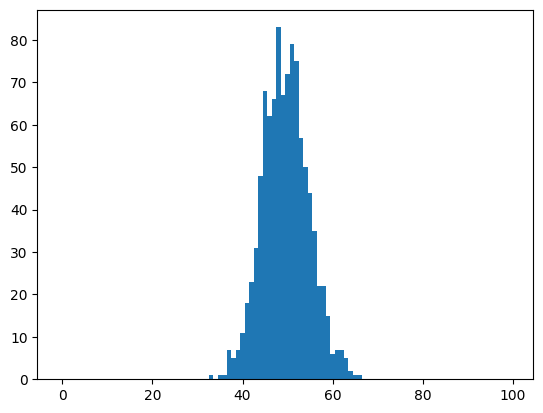

In [38]:
bins = np.arange(-0.5,100.5,1)

hist = plt.hist(coinflip_array, bins=bins)[0]

Check out the documentation for the `plt.hist()` function [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) , what is the first output from the function (what is the variable `hist` we just made)?

In [ ]:
''' 
The first output of the hist() function is an array of the bin values shown in the histogram.
'''

According to the central limit theorem the distribution of averages of many samples should follow a normal distribution. 

The number of heads in each trial is the same as the average value (average the 0s and 1s) times the number of flips), so this should also follow the central limit theorem

Let's make a plot of the probability density of our distribution. 

Make a plot with `plt.hist()` again, but this time use `density=True` in the arguments

This will make the y-axis be number of trials in the bin divided by the bin width

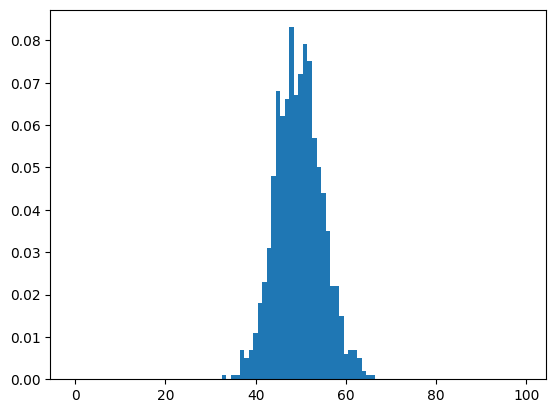

In [39]:
hist = plt.hist(coinflip_array, bins=bins, density=True)[0]

Now let's compare it to the Normal distribution, let's plot that again but on the same plot, let's plot the normal probability density function with our mean and standard deviation of each trial as $\mu$ and $\sigma$

The stats module in scipy already has a function for this

`stats.norm.pdf(x, loc=mu, scale=sigma)`

- So make an array of values for the x-axis that run from 0 to 100 with a small step size, like 0.1
- plot the histogram with density=True just like the last cell
- then use the scipy stats module to calculate the normal probability density at each x value
- then plot those values

Do the two curves look similar?


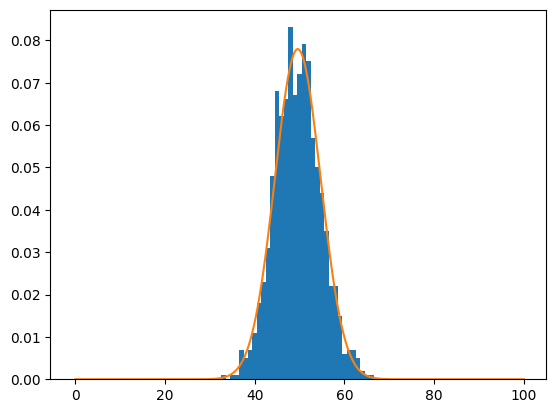

In [43]:
x = np.linspace(0,100,1000)

norm_pdf = stats.norm.pdf(x, loc=np.mean(coinflip_array), scale=np.std(coinflip_array))

plt.hist(coinflip_array, bins=bins, density=True)[0]

plt.plot(x, norm_pdf)

With a function for our PDF (probability density function), use the integration method we used in the homework to find the probability of there being between 40 and 60 heads in a trial
    
Count the number of trials that had between 40 and 60 head and see if your answer makes sense. 

In [51]:
norm_sum = 0
for norm in norm_pdf:
    norm_sum += 0.1 * norm
print(norm_sum)

0.9989999999999996
